Importing necessary modules

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Creating the databases for the different companies

In [13]:
appleDf = pd.read_csv('data_bases/apple.csv')
googleDf = pd.read_csv('data_bases/google.csv')
microsoftDf = pd.read_csv('data_bases/microsoft.csv')
twitterDf = pd.read_csv('data_bases/twitter.csv')


Counting positive and negative tweets for each company

In [14]:
def countTweets(df):
    positive = df['target'].value_counts().get(4)
    negative = df['target'].value_counts().get(0)
    return positive, negative

applePos, appleNeg = countTweets(appleDf)
googlePos, googleNeg= countTweets(googleDf)
microsoftPos, microsoftNeg = countTweets(microsoftDf)
twitterPos, twitterNeg = countTweets(twitterDf)

Visualising the different tweet counts

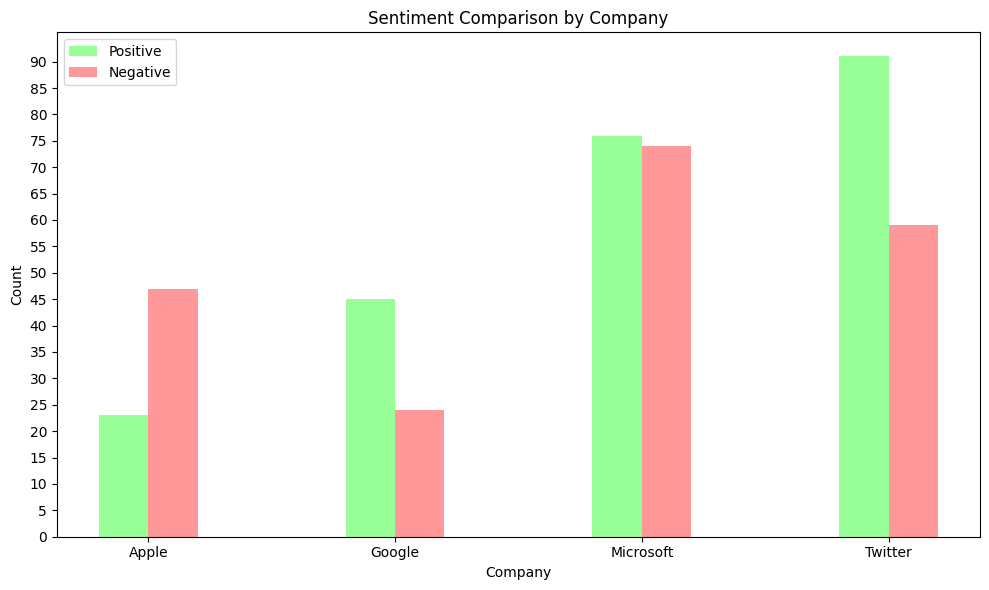

In [20]:
companies = ['Apple', 'Google', 'Microsoft', 'Twitter']
positive = [applePos, googlePos, microsoftPos, twitterPos]
negative = [appleNeg, googleNeg, microsoftNeg, twitterNeg]

bar_width = 0.2
x = np.arange(len(companies))

plt.figure(figsize=(10, 6))
plt.bar(x, positive, width=bar_width, label='Positive', color='#99ff99')
plt.bar(x + bar_width, negative, width=bar_width, label='Negative', color='#ff9999')

plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Sentiment Comparison by Company')
plt.xticks(x+(bar_width)/2, companies)
y_ticks = np.arange(0, max(positive + negative) + 1, step=5) 
plt.yticks(y_ticks)

plt.legend()
plt.tight_layout()
plt.show()

Visualising the different tweet counts as a percentage of the total tweets mentioning the company

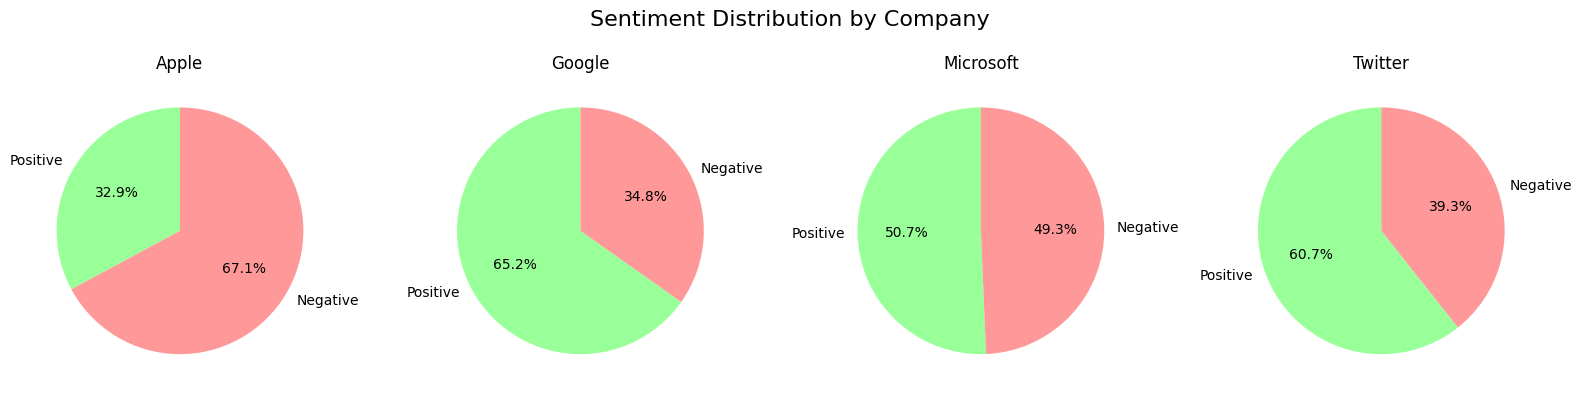

In [16]:

data = [
    [applePos, appleNeg],
    [googlePos, googleNeg],
    [microsoftPos, microsoftNeg],
    [twitterPos, twitterNeg],
]
labels = ['Positive', 'Negative']
colors = ['#99ff99', '#ff9999']

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes):
    ax.pie(
        data[i],
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
    )
    ax.set_title(companies[i])

plt.suptitle('Sentiment Distribution by Company', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


Calculating the median for each company

In [17]:
appleMedianTarget = appleDf['target'].median()
googleMedianTarget = googleDf['target'].median()
microsoftMedianTarget = microsoftDf['target'].median()
twitterMedianTarget = twitterDf['target'].median()

print(f"Median target for Apple: {appleMedianTarget}")
print(f"Median target for Google: {googleMedianTarget}")
print(f"Median target for Microsoft: {microsoftMedianTarget}")
print(f"Median target for Twitter: {twitterMedianTarget}")

Median target for Apple: 0.0
Median target for Google: 4.0
Median target for Microsoft: 4.0
Median target for Twitter: 4.0
